# Reading and writing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(10)
# Set max rows displayed for readability
pd.set_option('display.max_rows', 6)
# Plot settings
plot_style = {'xtick.labelsize': 20,
                  'ytick.labelsize': 20,
                  'font.size': 22,
                  'figure.autolayout': True,
                  'figure.figsize': (10, 5.5),
                  'axes.titlesize': 22,
                  'axes.labelsize': 20,
                  'lines.linewidth': 4,
                  'lines.markersize': 6,
                  'legend.fontsize': 16,
                  'mathtext.fontset': 'stix',
                  'font.family': 'STIXGeneral',
                  'legend.frameon': False}
plt.style.use(plot_style)

In this chapter, you'll learn about reading and writing data.

This chapter uses the **pandas** and **pandas-datareader** packages. If you're running this code, you may need to install these packages using, for example, `pip install packagename` on your computer's command line. (If you're not sure what a command line or terminal is, take a quick look at the basics of coding chapter.)

![From the pandas documentation](https://pandas.pydata.org/pandas-docs/stable/_images/02_io_readwrite1.svg)

There are a huge range of input and output formats available in **pandas**: Stata (.dta), Excel (.xls, .xlsx), csv (tab or comma or whatever, use the `sep=` keyword), big data formats (HDF5, parquet), JSON, SAS, SPSS, SQL, and more; there's a [full list](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) of formats available in the documentation.

## Reading in data from a file

The syntax for reading in data is usually very similar and of the form `pd.read_` and then the format e.g. `df = pd.read_stata('path/to/statafile.dta')` for Stata. Here's a really typical example of reading in a csv called 'data.csv':

```python
import os
import pandas as pd

df = pd.read_csv(os.path.join('path', 'to', 'data.csv'))
```

This code assumes that python is being executed in a directory that has a subdirectory 'path', which has a subdirectory 'to', inside which is 'data.csv'. Why are we using `os.path.join(...)` instead of just passing `pd.read_csv('path/to/data.csv'))`? The answer is that paths are not all alike; they're different on Linux/Mac and Windows. By saying `os.path.join` we tell Python to figure out how to create a path from the folder names.

### Reading data from lots of files

Quite often, you have a case where you need to read in data from many files at once. There are two tools that will help with this: glob and concatenate.

Imagine you have a directory full of files with names like 'Jan-2001-data.csv', 'Feb-2001-data.csv', and so on. Glob can help you grab the names of all of these files.

```python
import glob

list_of_files = glob.glob(os.path.join('directory', '*-data.csv'))
```

Here, the `*` character is a wildcard that can match to anything (including any number of characters). You can keep it more specific by, for example, searching for a single wildcard character with `?` or any single digit with `[0-9]`.

Okay, so you have a big list of file paths: now what!? Assuming that the files have the same structure (eg the same columns), we can use `pd.read_csv` in a list followed by `pd.concat` to collapse these down either by index or by column (typically it's by index):

```python
df = pd.concat([pd.read_csv(x) for x in list_of_files], axis=0)
```

### Working with complex Excel data

## Reading data from the internet and APIs

As you will have seen in some of the examples in this book, it's easy to read data from the internet once you have the url and file type. Here, for instance, is an example that reads in the 'storms' dataset:

In [2]:
pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/dplyr/storms.csv')

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,ts_diameter,hu_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007,10008,Kate,2015,11,11,6,35.2,-67.6,hurricane,1,70,985,207.1404,23.0156
10008,10009,Kate,2015,11,11,12,36.2,-62.5,hurricane,1,75,980,345.2340,34.5234
10009,10010,Kate,2015,11,11,18,37.6,-58.2,hurricane,1,65,980,379.7574,46.0312


Using an API (application programming interface) is another way to draw down information from the interweb. Their just a way for one tool, say Python, to speak to another tool, say a server, and usefully exchange information. The classic use case would be to post a request for data that fits a certain query via an API and to get a download of that data back in return. (You should always preferentially use an API over webscraping a site.)

Because they are designed to work with any tool, you don't actually need a programming language to interact with an API, it's just a *lot* easier if you do.

```{note}
An API key is needed in order to access some APIs. Sometimes all you need to do is register with site, in other cases you may have to pay for access.
```

 To see this, let's directly use an API to get some time series data. We will make the call out to the internet using the **requests** package.

An API has an 'endpoint', the base url, and then a URL that encodes the question. Let's see an example with the ONS API for which the endpoint is "https://api.ons.gov.uk/". The rest of the API has the form 'key/value', for example we'll ask for timeseries data 'timeseries' followed by 'JP9Z' for the vacancies in the UK services sector. We then ask for 'dataset' followed by 'UNEM' to specify which overarching dataset the series we want is in. The last part asks for the data with 'data'. Often you won't need to know all of these details, but it's useful to see a detailed example.

The data that are returned by APIs are typically in JSON format, which looks a lot like a nested Python dictionary and its entries can be accessed in the same way--this is what is happening when getting the series' title in the example below. JSON is not good for analysis, so we'll use **pandas** to put the data into shape.

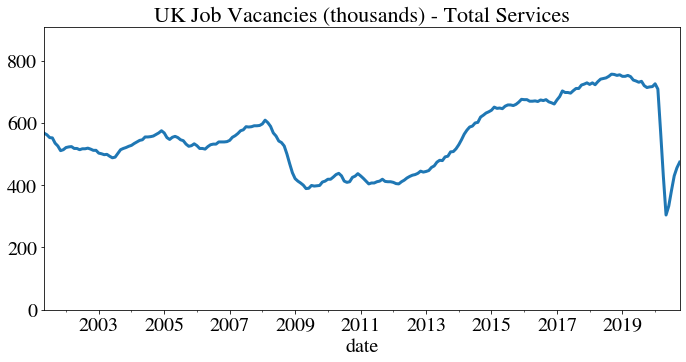

In [3]:
import requests

url = 'https://api.ons.gov.uk/timeseries/JP9Z/dataset/UNEM/data'

# Get the data from the ONS API:
json_data = requests.get(url).json()

# Prep the data for a quick plot
title = json_data['description']['title']
df = (pd.DataFrame(pd.json_normalize(json_data['months']))
        .assign(date=lambda x: pd.to_datetime(x['date']),
                value=lambda x: pd.to_numeric(x['value']))
        .set_index('date'))

df['value'].plot(title=title, ylim=(0, df['value'].max()*1.2), lw=3.);

### An easier way to interact with (some) APIs

Although it didn't take much code to get the ONS data, it would be even better if it was just a single line, wouldn't it? Fortunately there are some packages out there that make this easy, but it does depend on the API (and APIs come and go over time).

By far the most comprehensive library for accessing extra APIs is [**pandas-datareader**](https://pandas-datareader.readthedocs.io/en/latest/), which provides convenient access to:

- FRED
- Quandl
- World Bank
- OECD
- Eurostat

and more.

Let's see an example using FRED (the Federal Reserve Bank of St. Louis' economic data library). Again, let's look at job vacancies: in this case the total for the UK:

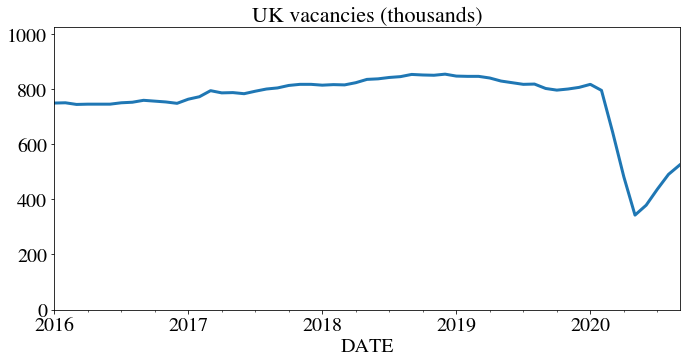

In [4]:
import pandas_datareader.data as web

series_name = 'LMJVTTUVGBM647S'
title = 'UK vacancies (thousands)'

# The first line retrieves the data:
df_v = (web.DataReader(series_name, 'fred')
        .rename(columns={series_name: title})
        .divide(1e3))

df_v.plot(title=title, legend=False, ylim=(0, df_v[title].max()*1.2), lw=3.);

## Writing data to file

### Formats

You may wonder what file format to use in your work. Note that data formats differ in whether they are text based (csv, JSON) or binary (encoded and compressed, like Python's pickle format). The former tend to be more easy to use with a range of tools, while the latter are usually faster to read/write and take up less space on disk.

There's a lot to be said for plain old csv because it's interoperable between so many different software tools. I highly recommend it for your final results, if they will be shared. Its only trouble is that it's not very efficiency with space, and it's not 'intelligent' about column datatypes. If you want a format for intermediate data within a project, I tend to recommend parquet, which scales well to big data (it is very efficient with disk space) and has excellent read and write speeds. Feather is interoperable between Python and R and may also be a good choice. Depending on the structure of your data, you may find JSON a good option too.

If you're interested in how effective the different data formats are, there blog posts that address this question [here](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d) and [here](https://ursalabs.org/blog/2019-10-columnar-perf/).

It's best *not* to use formats associated with proprietary software, especially if the standard may change over time (Stata files change with the version of Stata used!!) or if opening the data in that tool might change it (hello Excel). It's also good practice *not* to use a data storage format that cannot easily be opened by other tools. For this reason, I don't generally recommend Python's pickle format or R's RDA format (though of course it's fine if your data is completely internal to your project and you're only using one language).



## Review